<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import pathlib
import PIL
from PIL import Image, ImageOps
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Input, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. About the Data

## Importing the dataset

In [2]:
def get_images(data_dir):
    data_dir = pathlib.Path(data_dir)

    for folder in data_dir.glob('*'):
        print('The', folder.name, 'folder has',
            len(list(folder.glob('*.jpg'))), 'pictures')
    image_count = len(list(data_dir.glob('*/*.jpg')))
    print(image_count, 'total images')
    return data_dir

def format_images(data_dir):
    gen = ImageDataGenerator(width_shift_range=0.2,
                                    height_shift_range=0.2, 
                                    horizontal_flip=True)
    #Have test set in a separate folder so no need to use 'validation_split' argument above
    return gen.flow_from_directory(
                                directory=data_dir,
                                seed=10,
                                batch_size=16,
                                class_mode='categorical',
                                shuffle=True,
                                target_size=(img_height, img_width))

## Dataset Description
This dataset contains approximately 7000 images, split into testing and training folders of brain scan images. These images can be classified into one of four categories: Giloma, Meningioma, NoTumor, and Pituitary. Each image is in black and white but does have 3 channels when converted into an array

In [3]:
# Getting training data
train_data_dir = './Training'
train_data_dir = get_images(train_data_dir)

The glioma folder has 1321 pictures
The meningioma folder has 1339 pictures
The notumor folder has 1595 pictures
The pituitary folder has 1457 pictures
5712 total images


In [4]:
test_data_dir = './Testing'
test_data_dir = get_images(test_data_dir)

The glioma folder has 300 pictures
The meningioma folder has 306 pictures
The notumor folder has 405 pictures
The pituitary folder has 300 pictures
1311 total images


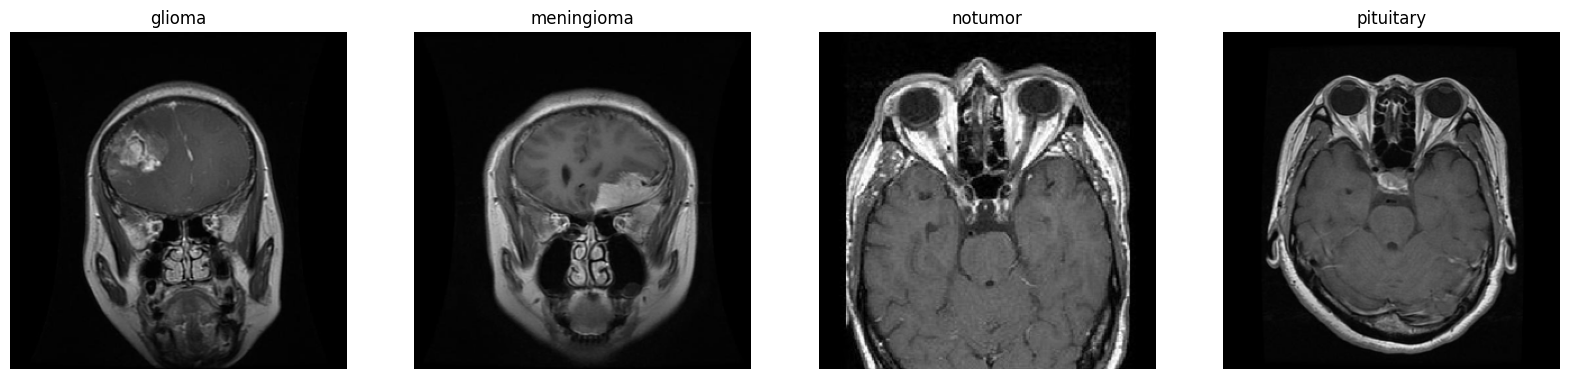

In [5]:
pics = list()
pics_arr = list()
p_class = list()

img_width = 300
img_height = 300

plt.figure(figsize=(20,5))
for index, folder in enumerate(train_data_dir.glob('*')):
    brain_img = list(train_data_dir.glob(folder.name + '/*'))
    image = PIL.Image.open(str(brain_img[0])).resize((img_width, img_height))
    pic_arr = np.array(image)
    clss = folder.name
    
    plt.subplot(1,4,index+1)
    plt.imshow(image)
    plt.title(clss)
    plt.axis('off')
    
    pics.append(image)
    pics_arr.append(pic_arr)
    p_class.append(clss)

In [6]:
train_set = format_images(train_data_dir)

Found 5712 images belonging to 4 classes.


In [7]:
test_set = format_images(test_data_dir)

Found 1311 images belonging to 4 classes.


## Analysis Objective
The primary objective of this analysis is to utilize the power of Deep Learning Networks to classify these images into their respective categories. Being able to achieve a relatively accurate model has revolutionary applications, being able to achieve a diagnosis by examining the image in a much more detailed fashion compared to the human eye.

# 2. Model Construction & Testing

## Model 1: Manually constructed Convolutional Neural Network
To begin, we constructed a convolutional neural network (which specializes in processing images) which utilized inception to break down the image into its distinct features and then classify them with a sequence of dense layers. The specific model constructed below has 13 layers total and over 20,000,000 trainable parameters. Despite how large this model seems, it severely struggled with underfitting, only having a max accuracy of about 30%, making it slightly better than just guessing.

In [8]:
#Model definition
#Feature layers
input = Input(shape=(300, 300, 3), name='input')
conv1a = Conv2D(1, (1,1), activation='relu', padding='same', name='layer1a')(input)
conv1b = Conv2D(1, (3,3), activation='relu', padding='same', name='layer1b')(conv1a)
conv2a = Conv2D(1, (1,1), activation='relu', padding='same', name='layer2a')(input)
conv3a = Conv2D(1, (1,1), activation='relu', padding='same', name='layer3a')(input)
conv3b = Conv2D(1, (5,5), activation='relu', padding='same', name='layer3b')(conv3a)
conv4a = MaxPooling2D(pool_size=(3,3), padding='same', strides=(1,1), name='layer4a')(input)
conv4b = Conv2D(1, (1,1), activation='relu', padding='same', name='layer4b')(conv4a)
concat = keras.layers.Concatenate(axis=3)([conv1b, conv2a, conv3b, conv4b])
#Classification layers
flatten = Flatten()(concat)
dense1 = Dense(64, activation='relu')(flatten)
dropout = Dropout(0.25)(dense1)
dense2 = Dense(32, activation='relu')((dropout))
classifier = Dense(4, activation='softmax')(dense2)
model = Model(input, classifier)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 300, 300,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1a (Conv2D)    │ (None, 300, 300,  │          4 │ input[0][0]       │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer3a (Conv2D)    │ (None, 300, 300,  │          4 │ input[0][0]       │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer4a             │ (None, 300, 300,  │          0 │ input[0][0]       │
│ (MaxPooling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1b (Conv2D)    │ (None, 300, 300,  │         10 │ layer1a[0][0]     │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer2a (Conv2D)    │ (None, 300, 300,  │          4 │ input[0][0]       │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer3b (Conv2D)    │ (None, 300, 300,  │         26 │ layer3a[0][0]     │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer4b (Conv2D)    │ (None, 300, 300,  │          4 │ layer4a[0][0]     │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 300, 300,  │          0 │ layer1b[0][0],    │
│ (Concatenate)       │ 4)                │            │ layer2a[0][0],    │
│                     │                   │            │ layer3b[0][0],    │
│                     │                   │            │ layer4b[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 360000)    │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │ 23,040,064 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 4)         │        132 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,042,328 (87.90 MB)

 Trainable params: 23,042,328 (87.90 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from keras.optimizers import SGD
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
model.fit(train_set, epochs=epochs, validation_data=test_set, batch_size=64, steps_per_epoch=50)

Epoch 1/5


c:\GitHub\IBM_Machine_Learning\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 762ms/step - acc: 0.2564 - loss: 18875.5410 - val_acc: 0.3089 - val_loss: 1.3827
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 859ms/step - acc: 0.2725 - loss: 1.3863 - val_acc: 0.3089 - val_loss: 1.3832
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 796ms/step - acc: 0.3080 - loss: 1.3827 - val_acc: 0.3089 - val_loss: 1.3787
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 809ms/step - acc: 0.2673 - loss: 1.3869 - val_acc: 0.3089 - val_loss: 1.3809
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 795ms/step - acc: 0.2661 - loss: 1.3858 - val_acc: 0.2288 - val_loss: 1.3841


## Model 2: Using Transformation Learning & VGG
VGG is a model that has already been pre-trained on ImageNet Data, but through transfer learning, we can train it to detect different types of brain tumours. By loading in the pre-trained models, freezing the feature extraction parameters, and defining the Dense layers to perform our classification, then we can get a much more accurate model.

In [9]:
#Using VGG
from keras.applications import vgg16
input_shape = (300, 300, 3)

vgg = vgg16.VGG16(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape)

output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
basemodel = Model(vgg.input, output)

#Freezing layers for transfer learning
basemodel.trainable = False
for layer in basemodel.layers: layer.trainable = False

In [10]:
#Defining classification features
input_shape = basemodel.output_shape[1]

model = Sequential()
model.add(basemodel)
model.add(Dense(512, input_dim=input_shape, activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(4, activation='softmax'))
model.summary()

c:\GitHub\IBM_Machine_Learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_1 (Functional)       │ (None, 41472)          │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,081,220 (137.64 MB)

 Trainable params: 21,366,532 (81.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
from keras.optimizers import SGD
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(train_set, epochs=epochs, validation_data=test_set, steps_per_epoch=10)

Epoch 1/20


c:\GitHub\IBM_Machine_Learning\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 447s 49s/step - acc: 0.2361 - loss: 60.1348 - val_acc: 0.3905 - val_loss: 23.4311
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 416s 46s/step - acc: 0.4668 - loss: 26.6802 - val_acc: 0.6232 - val_loss: 10.2017
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 397s 44s/step - acc: 0.5973 - loss: 13.5981 - val_acc: 0.6758 - val_loss: 6.8189
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 342s 38s/step - acc: 0.6485 - loss: 8.7795 - val_acc: 0.7094 - val_loss: 6.0169
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 332s 36s/step - acc: 0.6609 - loss: 9.4734 - val_acc: 0.7368 - val_loss: 5.2154
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 690s 76s/step - acc: 0.6639 - loss: 8.5819 - val_acc: 0.7506 - val_loss: 3.8939
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 212s 23s/step - acc: 0.6820 - loss: 10.1870 - val_acc: 0.7185 - val_loss: 5.0495
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 211s 23s/step - acc: 0.6922 - loss: 6.8424 - val_acc: 0.7292 - val_loss: 4.9528
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 208s 23s/step - acc: 0.

As seen here, the model has a relatively high validation set accuracy, topping out at about 77%. It's not perfect, but it does demonstrate the power behind deep learning.

## Summary of the models/Summary of Key Findings

Before discussing the models trained and tested in this project, first we'll see why some of the other Deep Learning Networks were not chosen.
<ul>
    <li>Recurrent Neural Network: This model was not based on Sequential data with each image being independent.</li>
    <li>Autoencoders: The images just needed to be classified, not recreated. (Same goes for GANs)</li>
    <li>Reinforcement Learning: This is a supervised learning problem</li>
</ul>
<br />
As previously dicussed, the deep neural network that was manually constructed was not very good even for the many parameters it did have. It could have been deeper in an effort to avoid the underfitting that was seen, but in my case it would be too computationally expensive for my machine. Additionally I am working on a time constraint with this project so spending hours training a model is not something that I could afford. However, loading in the pre-trained model did work better, though it did run into some of the same computational issues, but this model was much better suited for the task at hand.

## Next Steps
When returning to this project, there are many possible next steps to attain further results listed below:
<ul>
    <li>Tune the hyperparameters to find a more optimal solution when there's more time</li>
    <li>Look at defining a more in-depth model from scratch with access to a device with a GPU</li>
    <li>Train a different pre-loaded model and see if it has an easier time fitting to the image data</li>
</ul>
<br>
In conclusion, Deep Learning is an incredibly powerful strategy for tackling machine learning problems. However, it is a very computationally expensive one, and when you do not have access to a GPU that can parallelize tasks efficiently, the training process can be very slow. 